In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk
from pathlib import Path
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from dotenv import find_dotenv, load_dotenv
load_dotenv(find_dotenv())
import numpy as np
import covidecg.data.utils as data_utils
np.random.seed(0)

ctrl_all = data_utils.load_stress_ecg_runs('../data/interim/ecg_runs_ctrl.csv', '../data/interim/ecg_runs')[0]

# plt.figure(figsize=(12, 6))
# plt.subplot(2, 1, 1)
# plt.plot(raw_signal, alpha=0.25, c='gray', label='raw')
# plt.plot(cleaned_signal, alpha=0.8, label='cleaned')
# plt.scatter(x=rpeaks, y=cleaned_signal[rpeaks], c='red', label="R Peaks")
# plt.legend()
# plt.subplot(2, 1, 2)
# plt.plot(quality, c='green')
# plt.show()

In [2]:
def load_examples(ctrl_all, n=10):
    ctrl_examples = ctrl_all[np.random.choice(ctrl_all.shape[0], n, replace=False)]
    ctrl_examples = data_utils.EcgLeadSelector('MDC_ECG_LEAD_II').fit_transform(ctrl_examples)
    ctrl_examples = ctrl_examples.squeeze()
    return ctrl_examples

def plot_signal(signal, ax, clean_method=None):
    cleaned_signal = signal
    if clean_method == 'biosppy':
        cleaned_signal = ecg.ecg(signal, sampling_rate=500, show=False)['filtered']
    elif clean_method:
        cleaned_signal = nk.ecg_clean(signal, sampling_rate=500, method=clean_method)

    ax[0].plot(signal, c='gray')
    ax[1].plot(cleaned_signal, c='red')

def plot_some_examples(examples, title, clean_method):
    fig, ax = plt.subplots(examples.shape[0], 2, figsize=(15, examples.shape[0] * 1.5))
    # plt.tight_layout()
    ax[0, 0].title.set_text("Input signal")
    ax[0, 1].title.set_text(title)
    for i, signal in enumerate(examples):
        plot_signal(signal, ax[i], clean_method=clean_method)

NameError: name 'ecg' is not defined

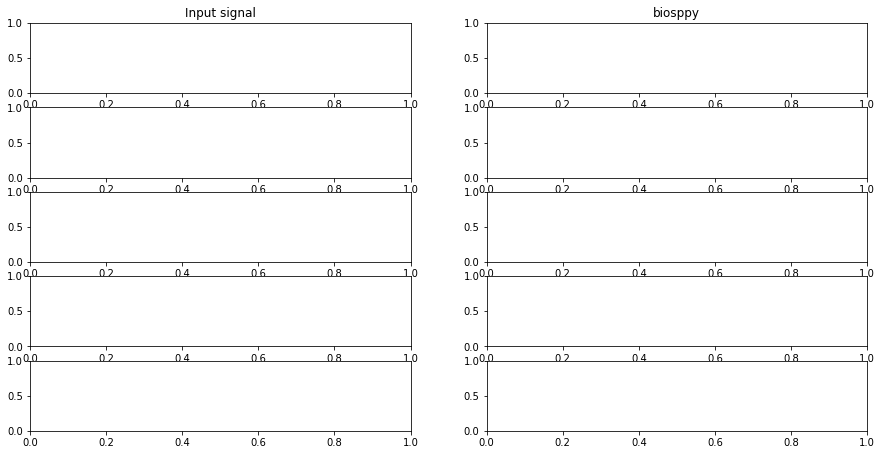

In [3]:
ctrl_examples = load_examples(ctrl_all, n=5)
plot_some_examples(ctrl_examples, title="biosppy", clean_method="biosppy")
plot_some_examples(ctrl_examples, title="pantompkins1985", clean_method="pantompkins1985")
plot_some_examples(ctrl_examples, title="hamilton2002", clean_method="hamilton2002")
plot_some_examples(ctrl_examples, title="elgendi2010", clean_method="elgendi2010")

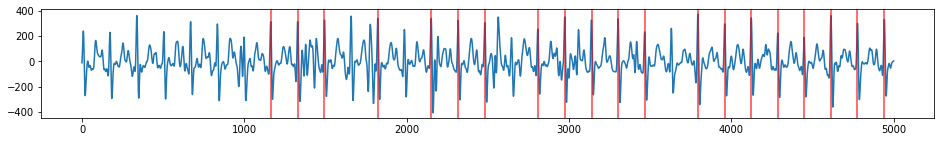

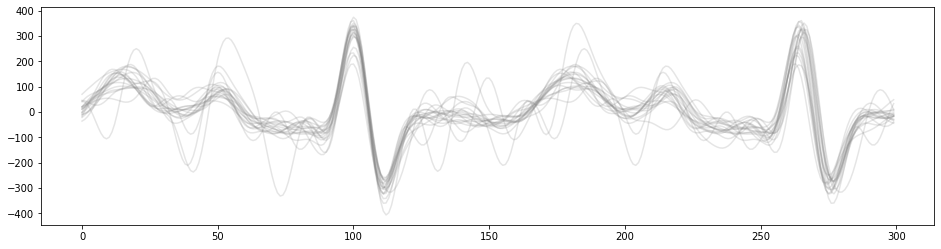

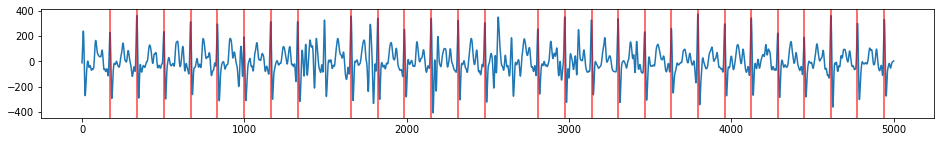

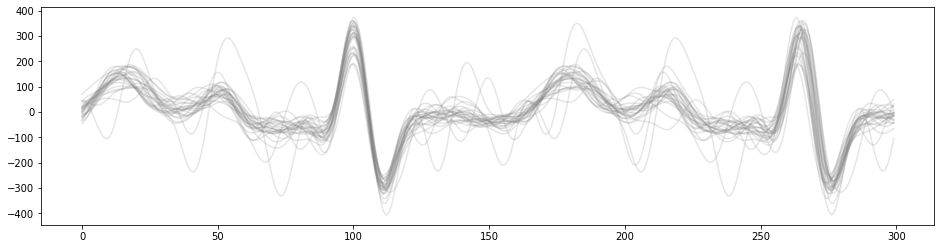

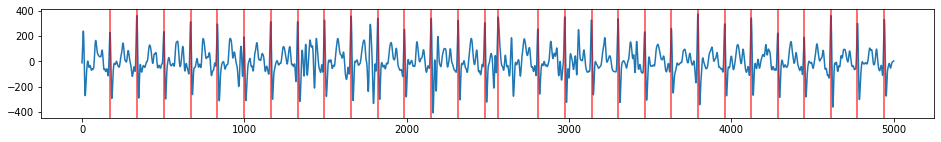

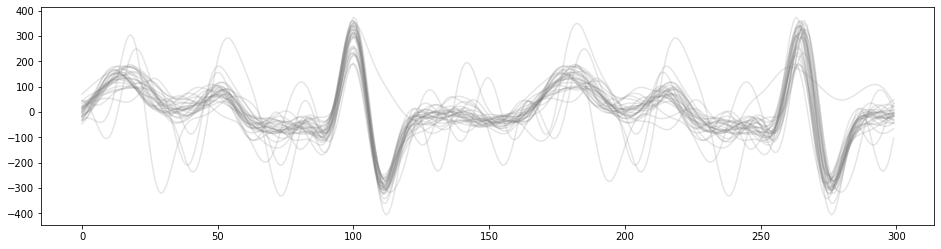

rpeaks_christov [1162 1328 1493 1822 2150 2317 2481 2807 2973 3138 3302 3466 3793 3958
 4122 4285 4448 4613 4776 4942]
rpeaks_nk [ 172  338  504  669  834  998 1162 1328 1657 1822 1986 2150 2317 2481
 2807 2973 3138 3302 3466 3630 3793 3958 4122 4285 4448 4613 4776 4942]
rpeaks_hamilton_corrected [ 172  338  504  669  834  998 1162 1328 1493 1657 1822 1986 2150 2317
 2481 2563 2807 2973 3138 3302 3466 3630 3793 3958 4122 4285 4448 4613
 4776 4942]
False


In [ ]:
import biosppy.signals.ecg as ecg

ex = ecg.ecg(ctrl_examples[0], sampling_rate=500, show=False)['filtered']

rpeaks_christov = ecg.christov_segmenter(ex, sampling_rate=500)[0]
rpeaks_nk = nk.ecg_peaks(ex, sampling_rate=500)[1]['ECG_R_Peaks']
rpeaks_hamilton = ecg.hamilton_segmenter(ex, sampling_rate=500)[0]
rpeaks_hamilton_corrected= ecg.correct_rpeaks(ex, rpeaks=rpeaks_hamilton, sampling_rate=500)[0]

plt.figure(figsize=(16, 2))
plt.plot(ex)
for _rpeak in rpeaks_christov:
    plt.axvline(_rpeak, alpha=0.75, c='red')
plt.figure(figsize=(16, 4))
for segments in ecg.extract_heartbeats(ex, rpeaks=rpeaks_christov, sampling_rate=500)[0]:
    plt.plot(segments, c='gray', alpha=0.2)
plt.show()

plt.figure(figsize=(16, 2))
plt.plot(ex)
for _rpeak in rpeaks_nk:
    plt.axvline(_rpeak, alpha=0.75, c='red')
plt.figure(figsize=(16, 4))
for segments in ecg.extract_heartbeats(ex, rpeaks=rpeaks_nk, sampling_rate=500)[0]:
    plt.plot(segments, c='gray', alpha=0.2)
plt.show()

plt.figure(figsize=(16, 2))
plt.plot(ex)
for _rpeak in rpeaks_hamilton_corrected:
    plt.axvline(_rpeak, alpha=0.75, c='red')
plt.figure(figsize=(16, 4))
for segments in ecg.extract_heartbeats(ex, rpeaks=rpeaks_hamilton_corrected, sampling_rate=500)[0]:
    plt.plot(segments, c='gray', alpha=0.2)
plt.show()

print("rpeaks_christov", rpeaks_christov)
print("rpeaks_nk", rpeaks_nk)
print("rpeaks_hamilton_corrected", rpeaks_hamilton_corrected)
print(rpeaks_nk == rpeaks_hamilton)

> Wir wenden ecg.hamilton_segmenter für R peak detection (gute Ergebnisse und default in ecg.ecg()) und anschließend ecg.correct_rpeaks() für die Feinkorrektur an.

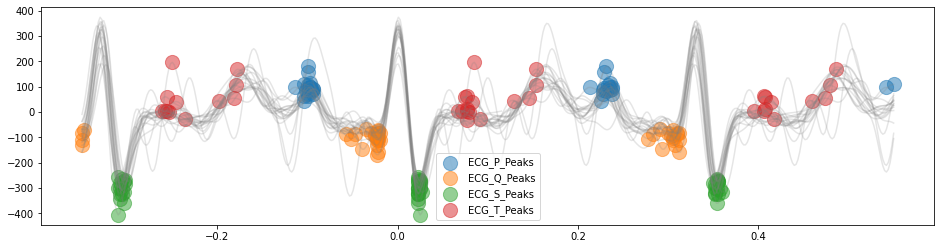

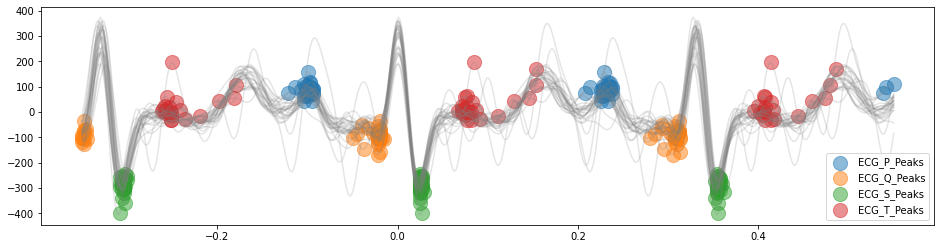

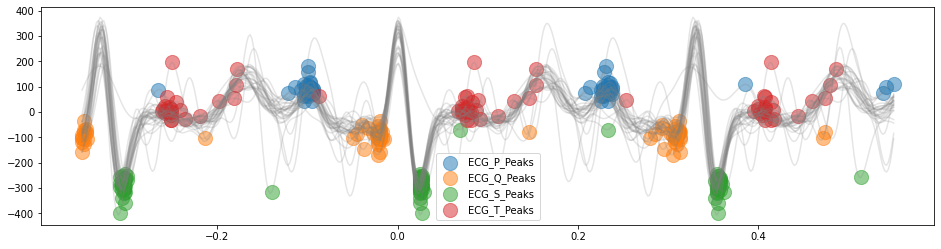

In [ ]:
plt.rcParams['figure.figsize'] = (16, 4)

nk.ecg_delineate(ex, rpeaks=rpeaks_christov, sampling_rate=500, show=True)
nk.ecg_delineate(ex, rpeaks=rpeaks_nk, sampling_rate=500, show=True)
nk.ecg_delineate(ex, rpeaks=rpeaks_hamilton_corrected, sampling_rate=500, show=True)
pass

### Signal processing Pipeline

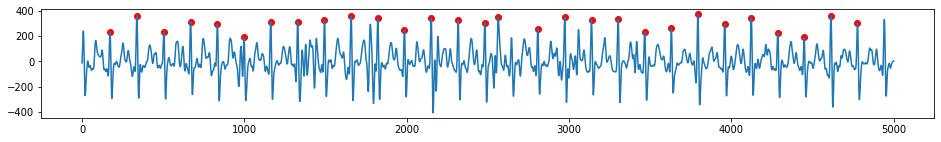

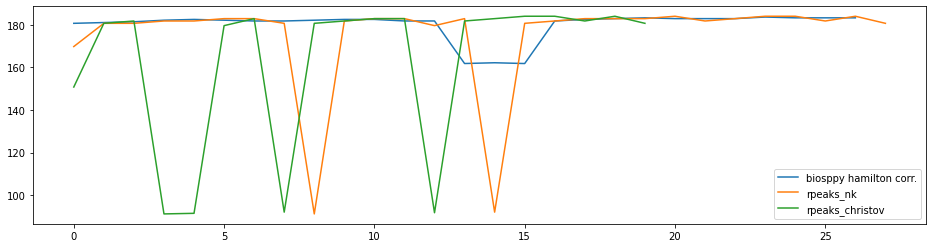

In [ ]:
a = ecg.ecg(ctrl_examples[0], sampling_rate=500, show=False)
plt.figure(figsize=(16, 2))
plt.plot(a['filtered'])
plt.scatter(a['rpeaks'], a['filtered'][a['rpeaks']], c='red')
plt.show()

array([150.79365079, 180.72289157, 181.81818182,  91.18541033,
        91.46341463, 179.64071856, 182.92682927,  92.02453988,
       180.72289157, 181.81818182, 182.92682927, 182.92682927,
        91.74311927, 181.81818182, 182.92682927, 184.04907975,
       184.04907975, 181.81818182, 184.04907975, 180.72289157])